<a href="https://colab.research.google.com/github/DeepakMishraDA/BIKE-SHARE-SYSTEM/blob/master/Capital_Bike_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project: BIKE SHARE SYSTEM**

**Bike sharing** systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Our task is to solve the business problem of predicting bike demand for a given date time. 

https://www.capitalbikeshare.com/


  - instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

##**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')

##**Explore the Data**

In [ ]:
hdf=pd.read_csv('/content/hour.csv')
hdf.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


###**Feature engineering**

**Rename the columns**

In [ ]:
hdf.rename(columns={'instant':'rec_id',
...: 'dteday':'datetime',
...: 'holiday':'is_holiday',
...: 'workingday':'is_workingday',
...: 'weathersit':'weather_condition',
...: 'hum':'humidity',
...: 'mnth':'month',
...: 'cnt':'total_count',
...: 'hr':'hour',
...: 'yr':'year'},inplace=True)

In [ ]:
hdf.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

**Update the season number with values**

In [ ]:
hdf.loc[hdf['is_holiday'] == 0, 'is_holiday'] = 'No'

hdf.loc[hdf['is_holiday'] == 1, 'is_holiday'] = 'Yes'

In [ ]:
hdf.loc[hdf['season'] == 1, 'season'] = 'Winter'
hdf.loc[hdf['season'] == 2, 'season'] = 'Spring'
hdf.loc[hdf['season'] == 3, 'season'] = 'Summer'
hdf.loc[hdf['season'] == 4, 'season'] = 'Fall'

In [ ]:
hdf.weekday.value_counts()

**Calculate whether the day was weekend**

In [ ]:
hdf.loc[hdf['weekday'] < 5, 'is_weekend'] = 'False'
hdf.loc[hdf['weekday'] >= 5, 'is_weekend'] = 'True'

In [ ]:
hdf.head(2)

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,is_weekend
0,1,2011-01-01,Winter,0,1,0,No,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,True
1,2,2011-01-01,Winter,0,1,1,No,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,True


**Convert data types**

In [ ]:
hdf.dtypes

rec_id                 int64
datetime              object
season                object
year                   int64
month                  int64
hour                   int64
is_holiday            object
weekday                int64
is_workingday          int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
total_count            int64
is_weekend            object
dtype: object

In [ ]:
# date time conversion
hdf['datetime'] = pd.to_datetime(hdf.datetime)

# categorical variables
hdf['season'] = hdf.season.astype('category')
hdf['is_holiday'] = hdf.is_holiday.astype('category')
hdf['weekday'] = hdf.weekday.astype('category')
hdf['weather_condition'] = hdf.weather_condition.astype('category')
hdf['is_workingday'] = hdf.is_workingday.astype('category')
hdf['month'] = hdf.month.astype('category')
hdf['year'] = hdf.year.astype('category')
hdf['hour'] = hdf.hour.astype('category')
hdf['is_weekend'] = hdf.is_weekend.astype('category')

In [ ]:
hdf.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,is_weekend
0,1,2011-01-01,Winter,0,1,0,No,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,True
1,2,2011-01-01,Winter,0,1,1,No,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,True
2,3,2011-01-01,Winter,0,1,2,No,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,True
3,4,2011-01-01,Winter,0,1,3,No,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,True
4,5,2011-01-01,Winter,0,1,4,No,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,True


**Explore plots showing casual and registered proportion**

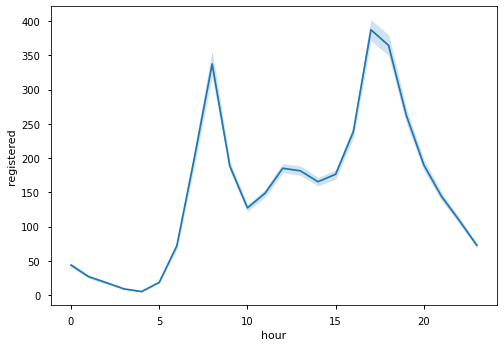

In [ ]:
sns.lineplot(x="hour", y="registered", data=hdf)

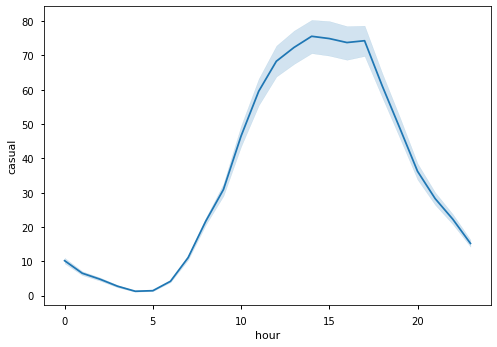

In [ ]:
sns.lineplot(x="hour", y="casual", data=hdf)

###**Data Visualization**

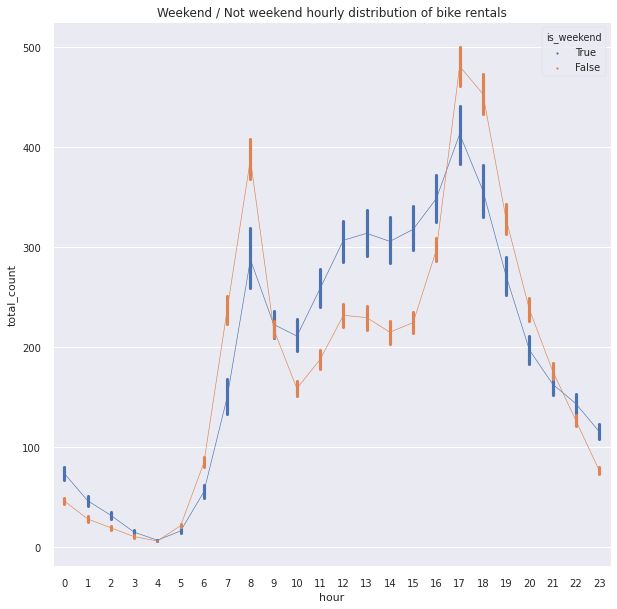

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.pointplot(data = hdf[['hour','total_count','is_weekend']], x = 'hour', y = 'total_count',
              scale = 0.2, hue = 'is_weekend');


ax.set(title = 'Weekend / Not weekend hourly distribution of bike rentals');

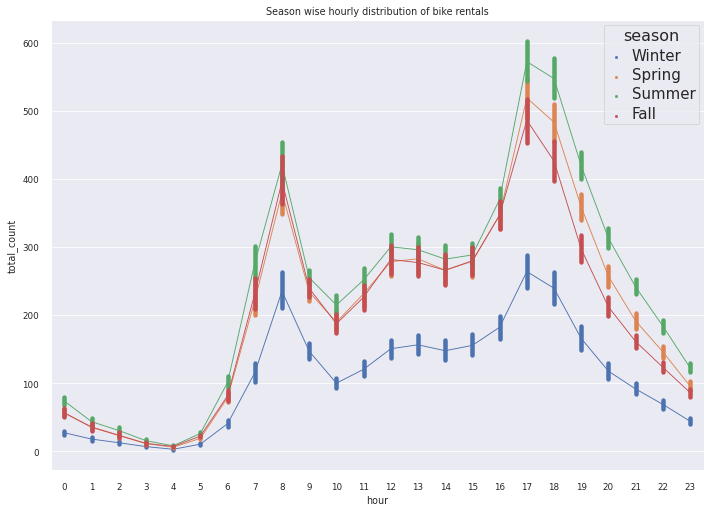

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
#sns.set_style("dark")

#fig, ax = plt.subplots()
ax = sns.pointplot(data = hdf[['hour','total_count','season']], x = 'hour', y = 'total_count',
              scale = 0.2, hue = 'season');

plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='16') # for legend title

ax.set(title = 'Season wise hourly distribution of bike rentals');

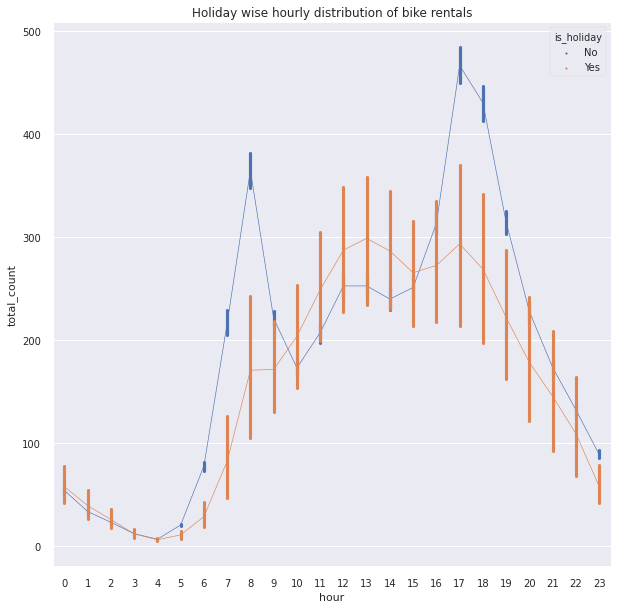

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.pointplot(data = hdf[['hour','total_count','is_holiday']], x = 'hour', y = 'total_count',
              scale = 0.2, hue = 'is_holiday');
ax.set(title = 'Holiday wise hourly distribution of bike rentals');

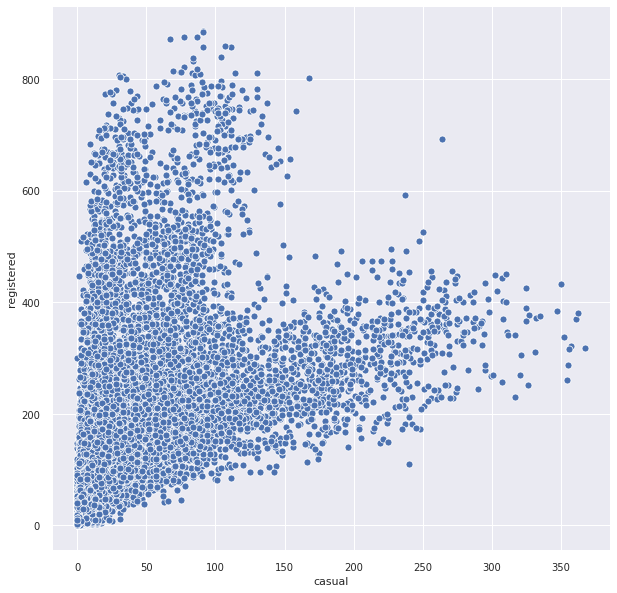

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(y="registered", x="casual", data=hdf,ax=ax);

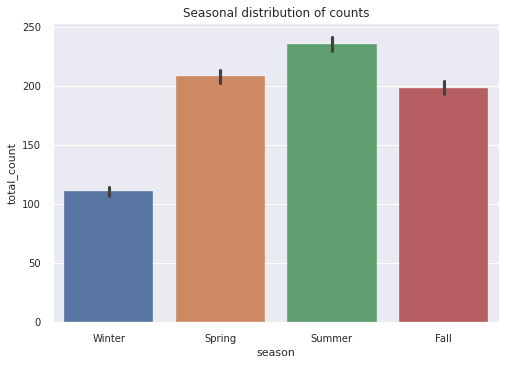

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=hdf[['season','total_count']],x="season",y="total_count")

ax.set(title="Seasonal distribution of counts");

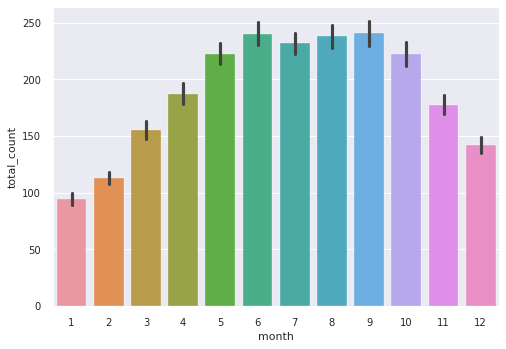

In [ ]:
sns.barplot(data=hdf[['month','total_count']],x="month",y="total_count")

ax.set(title="Monthly distribution of counts");

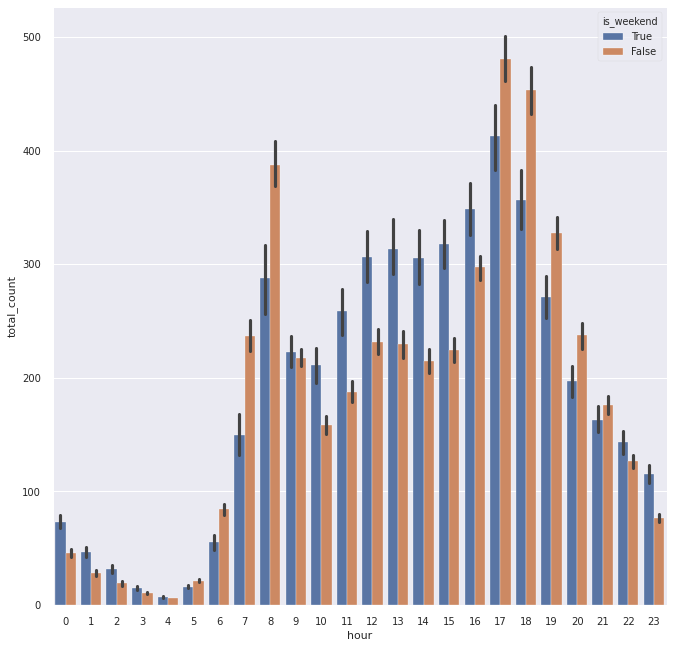

In [ ]:
fig, ax = plt.subplots(figsize=(11,11))
sns.barplot(x=hdf['hour'], y=hdf['total_count'], hue=hdf['is_weekend'], ax= ax)

In [ ]:
hdf.year.value_counts()

1    8734
0    8645
Name: year, dtype: int64

In [ ]:
hdf.loc[hdf['year'] == 0, 'year'] = 2011
hdf.loc[hdf['year'] == 1, 'year'] = 2012

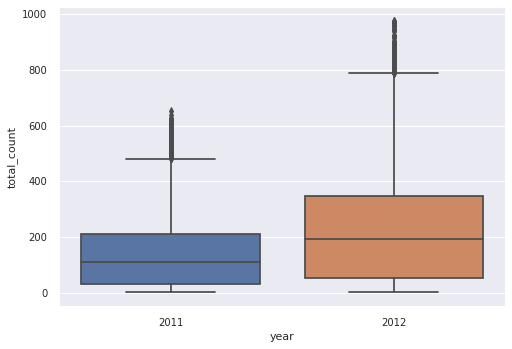

In [ ]:
sns.boxplot(y = 'total_count',x = 'year', data = hdf);

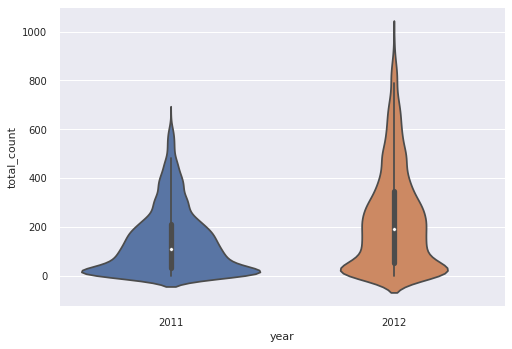

In [ ]:
 sns.violinplot(data=hdf[['year',
...: 'total_count']],
...: x="year",y="total_count");

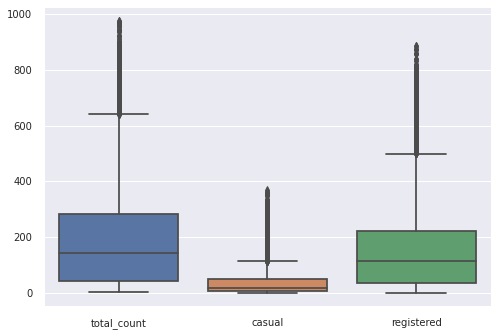

In [ ]:
sns.boxplot(data=hdf[['total_count','casual','registered']]);

###**Outlier Analysis**

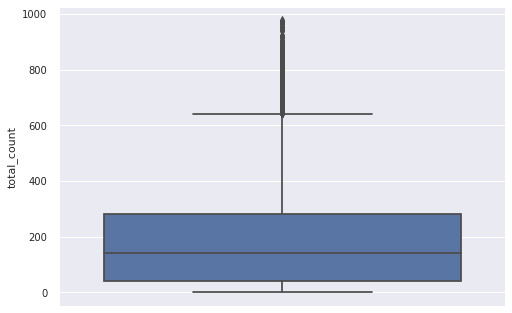

In [ ]:
sns.boxplot(hdf.total_count, orient= 'v');

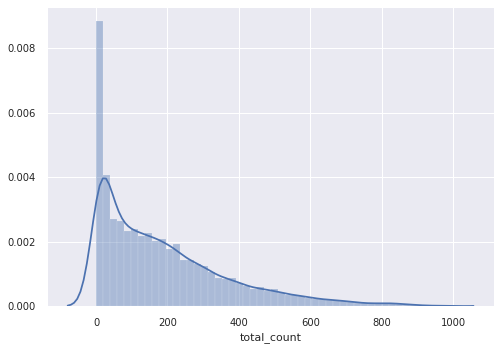

In [ ]:
sns.distplot(hdf.total_count);

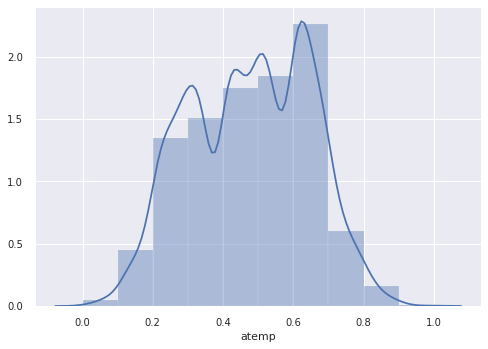

In [ ]:
sns.distplot(bins=10, a=hdf['atemp'])

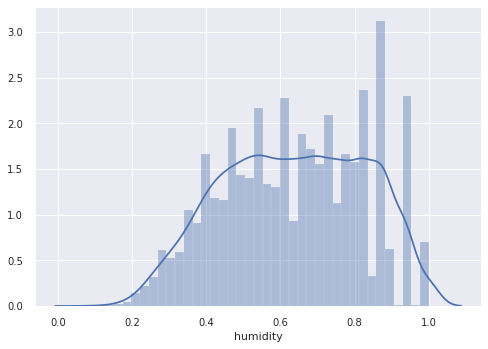

In [ ]:
sns.distplot(hdf.humidity);

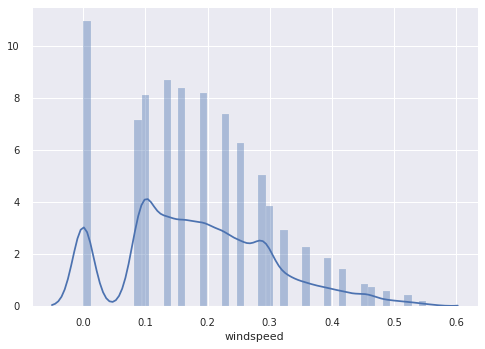

In [ ]:
sns.distplot(hdf.windspeed);

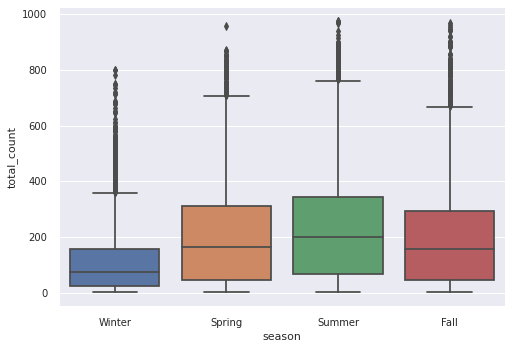

In [ ]:
sns.boxplot(x = 'season', y = 'total_count', data = hdf);

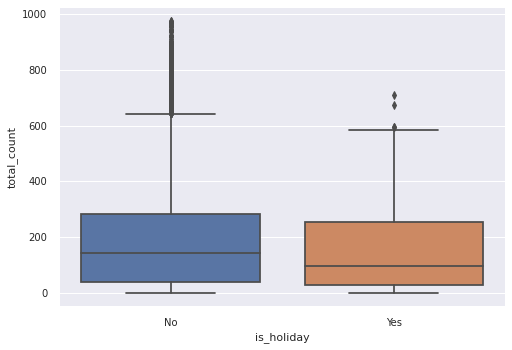

In [ ]:
sns.boxplot(x = 'is_holiday', y = 'total_count', data = hdf);

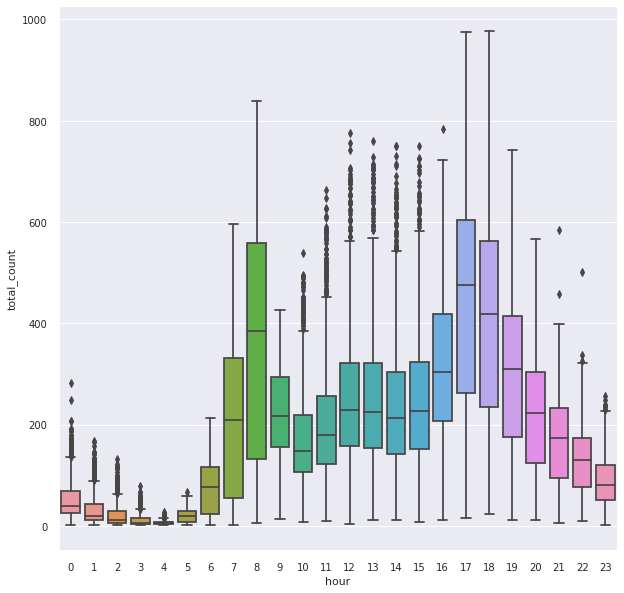

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'hour', y = 'total_count', data = hdf);

**Removal of Outliers**

In [ ]:
hdf

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,is_weekend
0,1,2011-01-01,Winter,2011,1,0,No,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,True
1,2,2011-01-01,Winter,2011,1,1,No,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,True
2,3,2011-01-01,Winter,2011,1,2,No,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,True
3,4,2011-01-01,Winter,2011,1,3,No,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,True
4,5,2011-01-01,Winter,2011,1,4,No,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Winter,2012,12,19,No,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,False
17375,17376,2012-12-31,Winter,2012,12,20,No,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,False
17376,17377,2012-12-31,Winter,2012,12,21,No,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,False
17377,17378,2012-12-31,Winter,2012,12,22,No,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,False






*  Remove the outliers in Total Count




In [ ]:
hdf = hdf[np.abs(hdf["total_count"]-hdf["total_count"].mean()) <= 3*hdf["total_count"].std()]

In [ ]:
hdf = hdf.drop(['rec_id'], axis = 1)

In [ ]:
hdf.reset_index(drop = True, inplace= True)



*   Remove the outliers in Windspeed




In [ ]:
hdf = hdf[np.abs(hdf["windspeed"]-hdf["windspeed"].mean()) <= 3*hdf["windspeed"].std()]
hdf.reset_index(drop = True, inplace= True)



*  Remove the outliers in Humidity, Casual, Registered


In [ ]:
hdf = hdf[np.abs(hdf["humidity"]-hdf["humidity"].mean()) <= 3*hdf["humidity"].std()]
hdf.reset_index(drop = True, inplace= True)

In [ ]:
hdf = hdf[np.abs(hdf["casual"]-hdf["casual"].mean()) <= 3*hdf["casual"].std()]
hdf.reset_index(drop = True, inplace= True)

In [ ]:
hdf = hdf[np.abs(hdf["registered"]-hdf["registered"].mean()) <= 3*hdf["registered"].std()]
hdf.reset_index(drop = True, inplace= True)

In [ ]:
hdf

,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count,is_weekend
0,2011-01-01,Winter,2011,1,0,No,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,True
1,2011-01-01,Winter,2011,1,1,No,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,True
2,2011-01-01,Winter,2011,1,2,No,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,True
3,2011-01-01,Winter,2011,1,3,No,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,True
4,2011-01-01,Winter,2011,1,4,No,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16258,2012-12-31,Winter,2012,12,19,No,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,False
16259,2012-12-31,Winter,2012,12,20,No,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,False
16260,2012-12-31,Winter,2012,12,21,No,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,False
16261,2012-12-31,Winter,2012,12,22,No,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,False


**Correlation Matrix**

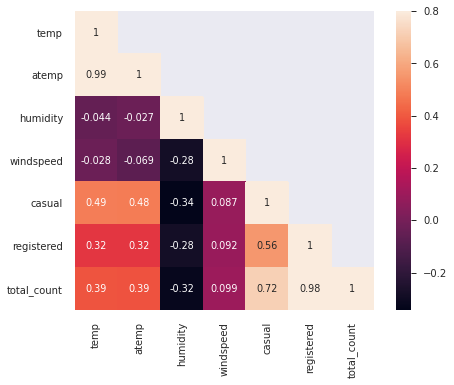

In [ ]:
corrMatt = hdf[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()


mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True);

###**Regression Analysis**

In [ ]:
import numpy as np
import statsmodels 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = hdf[['atemp', 'humidity', 'total_count']]
df = df[1:100]

In [ ]:
import statsmodels.formula.api as smf
reg = smf.ols('total_count ~ atemp + humidity', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     7.756
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           0.000754
Time:                        01:02:49   Log-Likelihood:                -515.66
No. Observations:                  99   AIC:                             1037.
Df Residuals:                      96   BIC:                             1045.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.6518     16.841      5.858      0.000      65.223     132.081
atemp        118.6717     59.078      2.009      0.047       1.403     235.940
humidity    -128.6233     33.076     -3.889      0.000    -194.279     -62.968
==============================================================================
Omnibus:                       25.052   Durbin-Watson:                   0.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.466
Skew:                           1.201   Prob(JB):                     1.99e-08
Kurtosis:                       4.681   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##**Modelling**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor

from sklearn.svm import SVR

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

In [ ]:
hdf=pd.read_csv('/content/hour.csv')
hdf.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [ ]:
hdf.rename(columns={'instant':'rec_id',
...: 'dteday':'datetime',
...: 'holiday':'is_holiday',
...: 'workingday':'is_workingday',
...: 'weathersit':'weather_condition',
...: 'hum':'humidity',
...: 'mnth':'month',
...: 'cnt':'total_count',
...: 'hr':'hour',
...: 'yr':'year'},inplace=True)

hdf.drop(columns = ['rec_id', 'datetime','year','month', 'hour'], inplace= True)

In [ ]:
hdf.season = hdf.season.astype('category')
hdf.is_holiday = hdf.is_holiday.astype('category')
hdf.weekday = hdf.weekday.astype('category')

hdf.is_workingday = hdf.is_workingday.astype('category')
hdf.weather_condition = hdf.weather_condition.astype('category')

In [ ]:
hdf.dtypes

season               category
is_holiday           category
weekday              category
is_workingday        category
weather_condition    category
temp                  float64
atemp                 float64
humidity              float64
windspeed             float64
casual                  int64
registered              int64
total_count             int64
dtype: object

In [ ]:
hdf = pd.get_dummies(hdf)

In [ ]:
df = hdf
cols_at_end = ['total_count']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]

In [ ]:
df.drop(columns = ['registered', 'casual', 'atemp'], inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


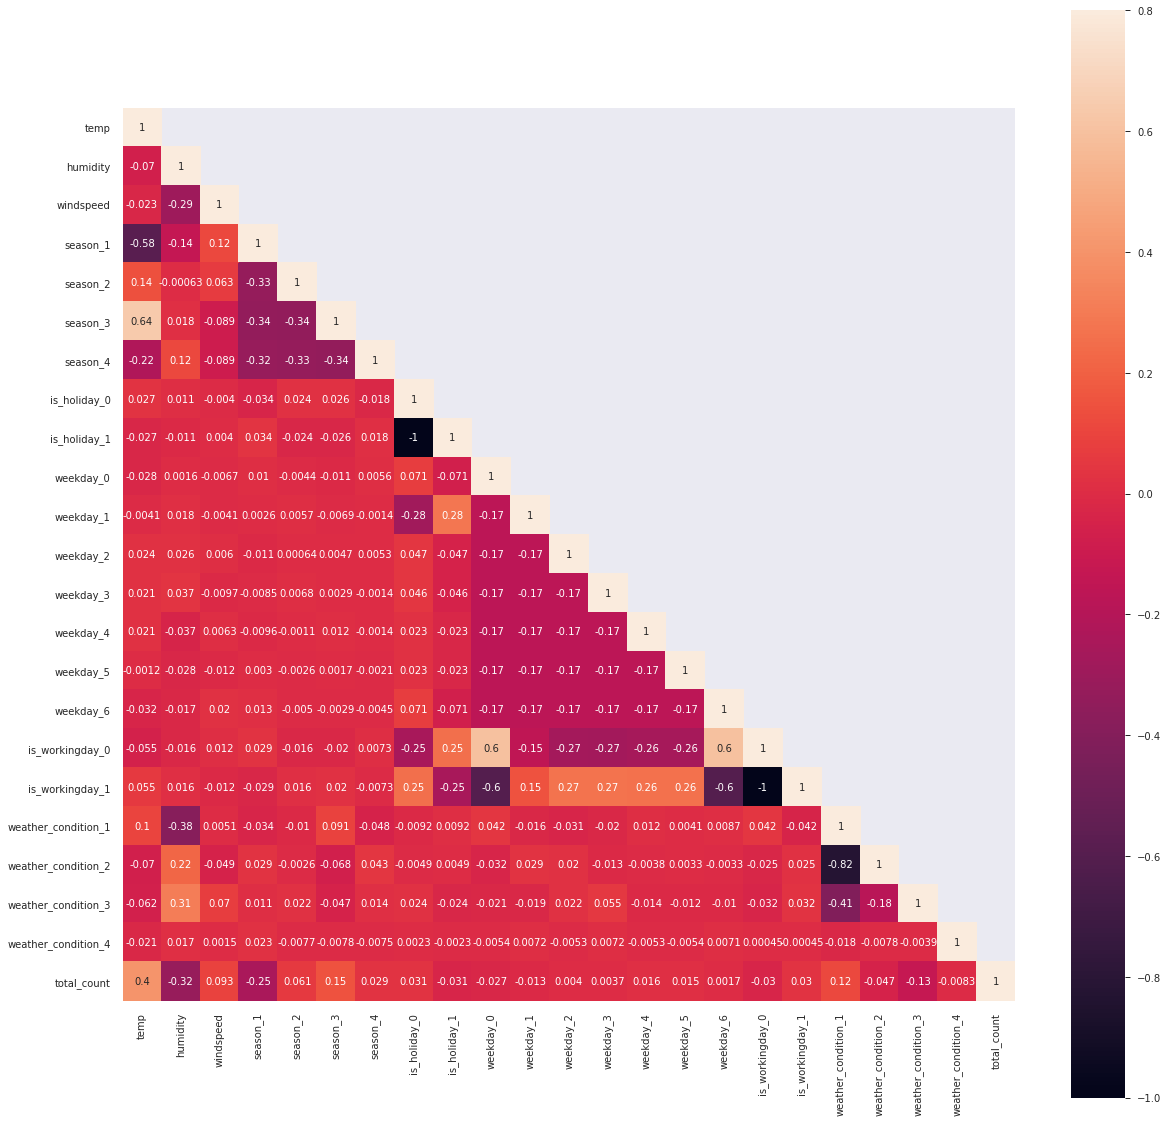

In [ ]:
#corrMatt = hdf[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
fig, ax = plt.subplots(figsize=(20,20))
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, ax = ax);

In [ ]:
x = df.drop(columns = ['total_count'])
y = df['total_count']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.20, random_state=42)

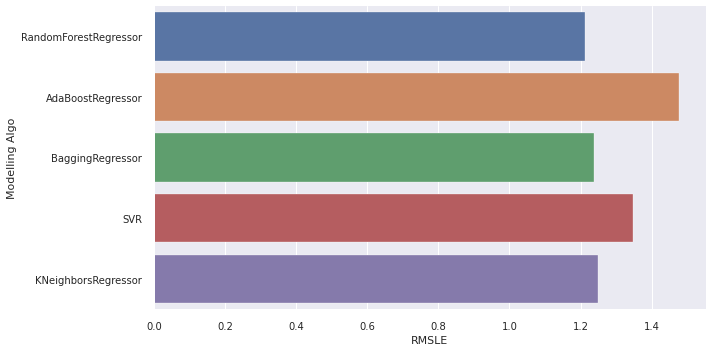

In [ ]:
models=[RandomForestRegressor(max_features= 'auto', n_estimators= 100, n_jobs= -1),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
rmse = []
d1= {}
d2 = {} 
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test, squared=False)))

d1={'Modelling Algo':model_names,'RMSLE':rmsle}   


d2={'Modelling Algo':model_names,'RMSE':rmse}   



rmsle_frame=pd.DataFrame(d1)
#rmsle_frame

rmse_frame=pd.DataFrame(d2)
#rmse_frame


sns.catplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',height=5,aspect=2);

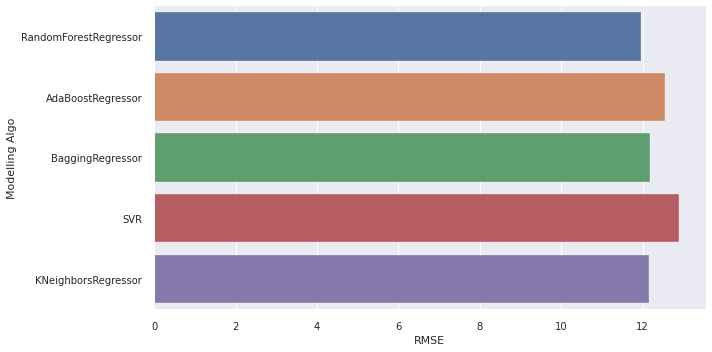

In [ ]:
sns.catplot(y='Modelling Algo',x='RMSE',data=rmse_frame,kind='bar',height=5,aspect=2);

In [ ]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}

clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))


clf_rf.best_params_

1.2042065439118588


{'max_features': 'sqrt', 'n_estimators': 100, 'n_jobs': -1}

##**Time Series Analysis and Prediction**

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima 

In [ ]:
df = pd.read_csv('hour.csv')

In [ ]:
df.loc[df['yr']==0,'year']='2011'
df.loc[df['yr']==1, 'year']='2012'

In [ ]:
df.rename(columns={'dteday':'date','cnt':'total_count'}, inplace=True)

In [ ]:
df1= df[df['year']=='2011']
df2= df[df['year']=='2012']

**Visualizing the Data**

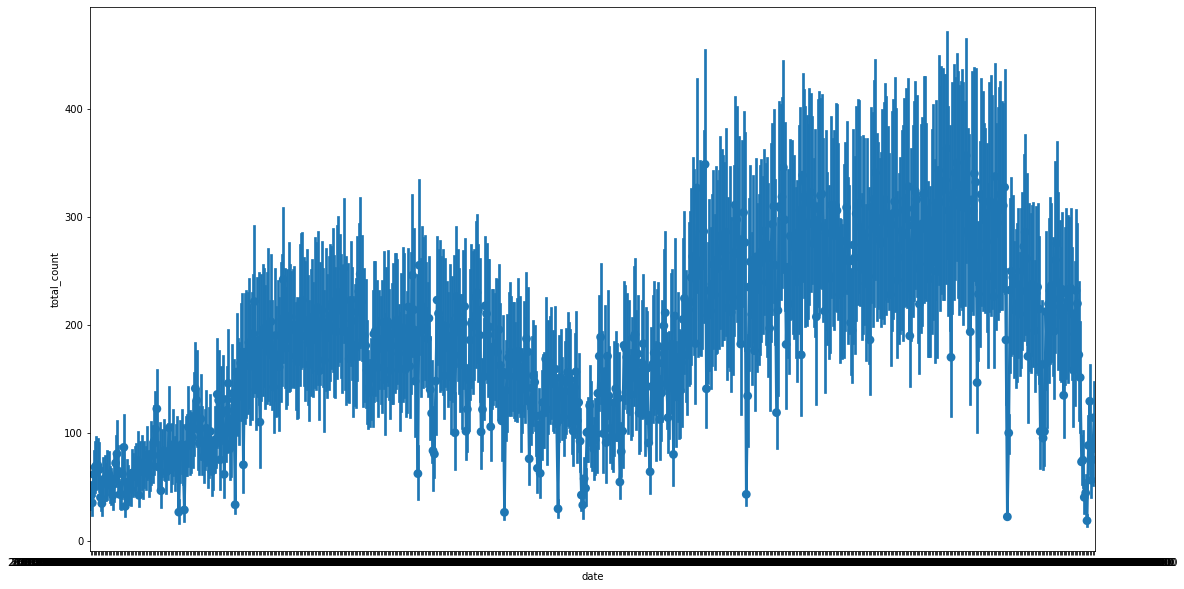

In [ ]:
fig,ax = plt.subplots(figsize= (18,10))
sns.pointplot(data=df, x='date', y='total_count')

**Observation: The series is completely non-stationary.**

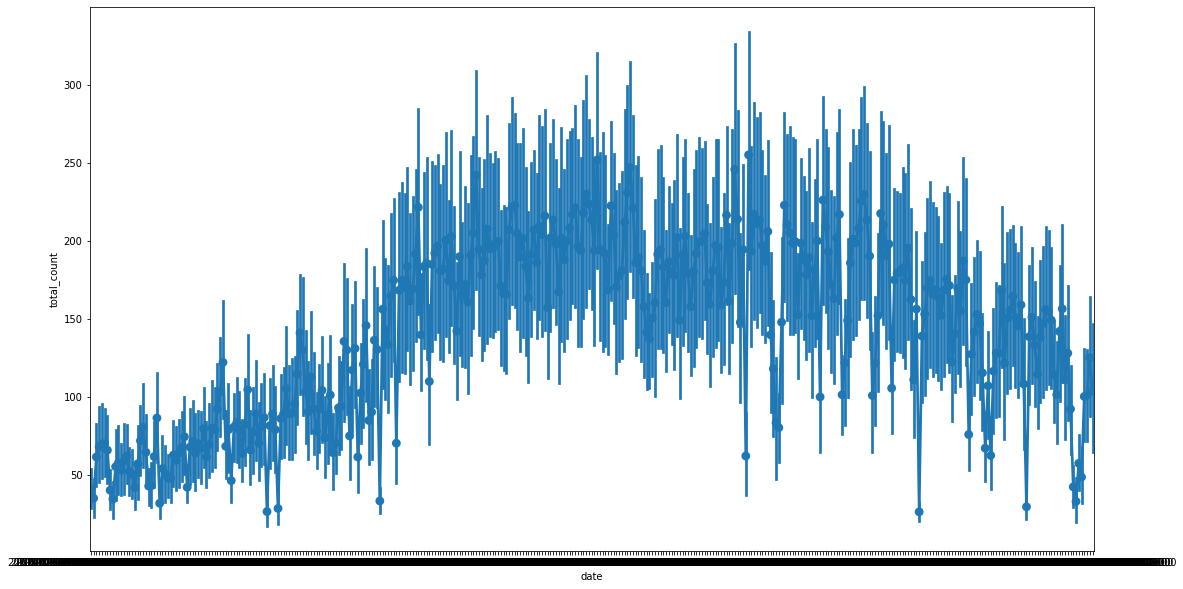

In [ ]:
fig,ax = plt.subplots(figsize= (18,10))
sns.pointplot(data=df1, x='date', y='total_count')

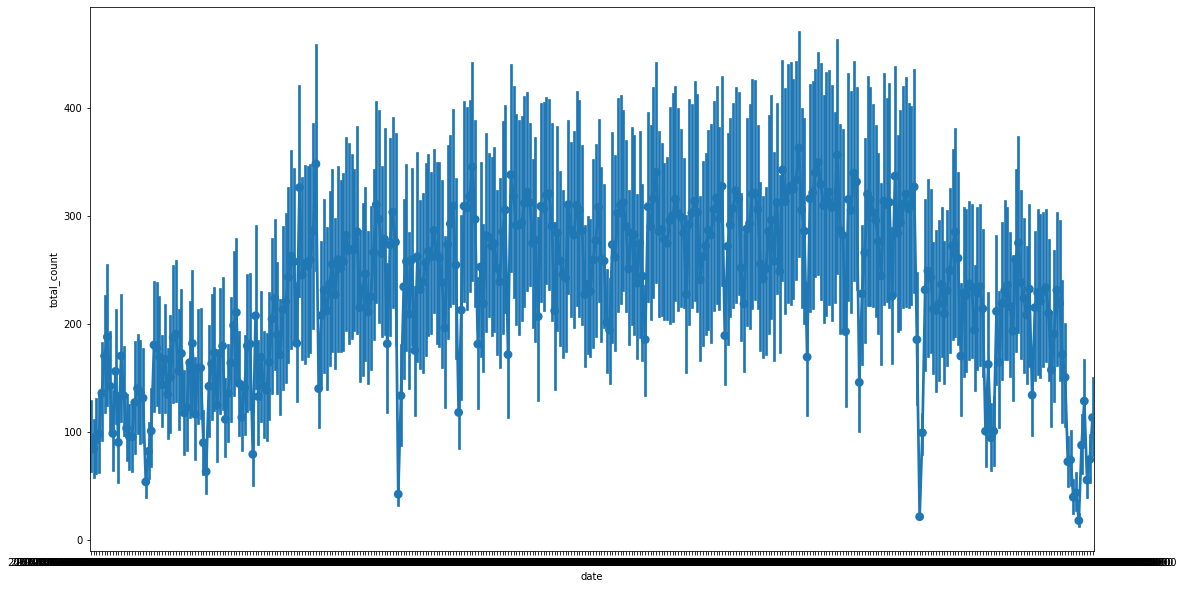

In [ ]:
fig,ax = plt.subplots(figsize= (18,10))
sns.pointplot(data=df2, x='date', y='total_count')

**Checking Stationarity**

In [ ]:
df = pd.read_csv('hour.csv')
df.rename(columns={'dteday':'date','cnt':'total_count'}, inplace=True)
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True,)
df= df[['date','total_count']]

In [ ]:
df = df.groupby(pd.Grouper(key='date', freq='1M')).count()

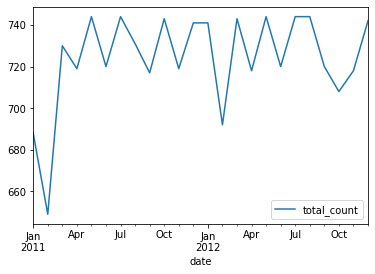

In [ ]:
df.plot()

**Doing a Dicky-Fuller Test**

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

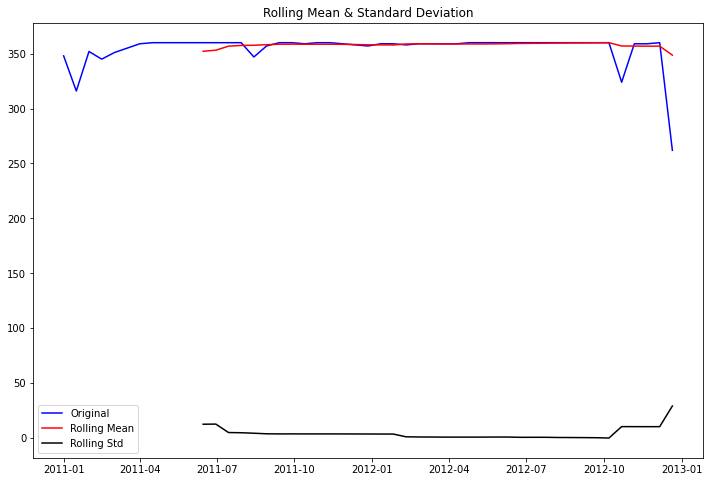

Results of Dickey-Fuller Test:
Test Statistic                 -1.443281
p-value                         0.561360
Lags Used                       3.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


In [ ]:
#dropna() to remove missing values
test_stationarity(df.dropna())

**p-value indicates stationarity**

**Checking autocorrelation**

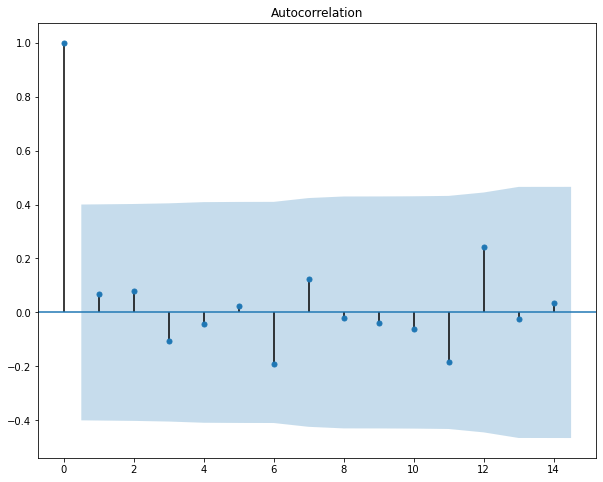

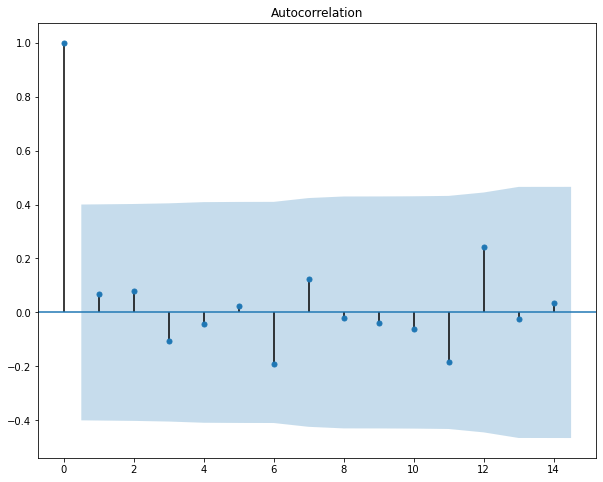

In [ ]:
fig,ax = plt.subplots(figsize= (10,8))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df,ax=ax)

**Deploying auto-arima model**

In [ ]:
from pmdarima import auto_arima 
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=2, max_q=2, m=12,
                           start_P=1, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=105.947, Time=0.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=98.265, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=102.191, Time=0.44 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=100.262, Time=0.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=102.258, Time=0.51 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=100.221, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=100.195, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=102.034, Time=0.07 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=99.580, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 2.922 seconds
98.26518079289374


In [ ]:
train = df.loc['2011-01-31':'2012-06-30','total_count']
test = df.loc['2012-07-30':,'total_count']

In [ ]:
stepwise_model.fit(train)
future_forecast = stepwise_model.predict(n_periods=6)

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
future_forecast['test']= test

In [ ]:
future_forecast

,Prediction,test
date,,
2012-07-31,744.0,744
2012-08-31,731.0,744
2012-09-30,717.0,720
2012-10-31,743.0,708
2012-11-30,719.0,718
2012-12-31,741.0,742


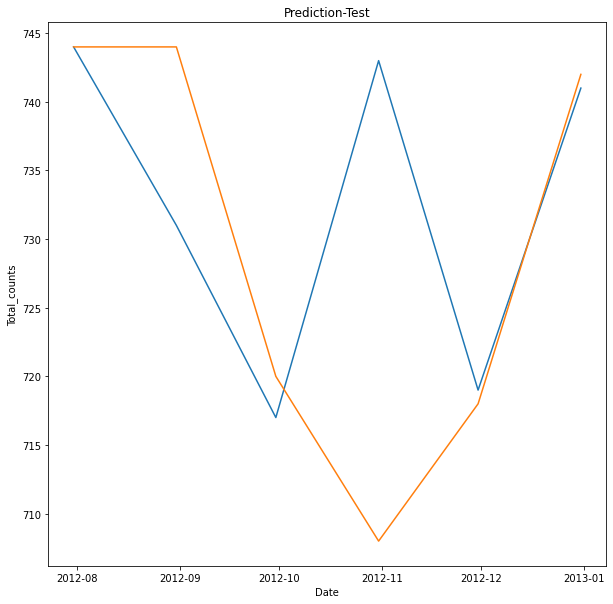

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(future_forecast.Prediction)
plt.plot(future_forecast.test)
plt.xlabel('Date')
plt.ylabel('Total_counts')
plt.title('Prediction-Test')
plt.show()